# Notebook to generate Fig-1 in manuscript " Implicit regularization in Heavy-ball momentum accelerated stochastic gradient descent "

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Specify parameters

In [3]:
x,y = 1,0.6  ##training
hs = 1e-2   ## learning-rate
beta = 0.9  ## momentum parameter
T = int(50000)  ##time iterations

##initialization
a2 = 2.8
b2 = 3.4

## Define trajectories based on (GD) and (GD+M) update

In [5]:


## GD
def traj_g(hs,a2,b2,T):
    a1,b1,a0,b0 = a2,b2,a2,b2
    as_history,bs_history = [a0,a1],[b0,b1]
    for i in range(T):
        at,bt = a1,b1
        a1 = a1 - hs*b1*x*((a1)*b1*x-y)
        b1 = b1 - hs*(at)*x*((at)*b1*x-y)
        a0,b0 = at,bt
        as_history.append(a1)
        bs_history.append(b1)
    return as_history,bs_history

##GD+M
def traj_gm(hs,a2,b2,T,beta=0.9):
    hm = hs*(1-beta) ##effective l.r same as GD
    a1,b1,a0,b0,beta = a2,b2,a2,b2,beta
    am_history,bm_history = [a0,a1],[b0,b1]
    for i in range(T):
        at,bt = a1,b1
        a1 = a1 - hm*b1*x*((a1)*b1*x-y) + beta*(a1-a0)
        b1 = b1 - hm*(at)*x*((at)*b1*x-y) + beta*(b1-b0)
        a0,b0 = at,bt
        am_history.append(a1)
        bm_history.append(b1)
    return am_history,bm_history


## Run trajectories for effective l.r (h/(1-beta)) for beta=0,0.5,0.8 and 0.9

In [6]:
as_history,bs_history = traj_g(hs,a2,b2,T)
am_history_09,bm_history_09 =  traj_gm(hs,a2,b2,T,beta=0.9)
am_history_08,bm_history_08 =  traj_gm(hs,a2,b2,T,beta=0.8)
am_history_05,bm_history_05 =  traj_gm(hs,a2,b2,T,beta=0.5)

## Plot the trajectories 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


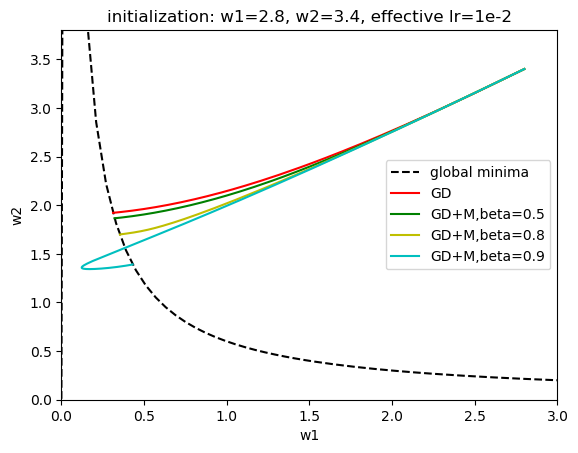

In [7]:
import torch 
a = np.linspace(-30,30,1000)
if torch.is_tensor(x):
  x,y = x.item(),y.item()
b = y/((a)*x)
#plt.figure(figsize=(7,7))
plt.plot(a,b,color ='black', linestyle='dashed',label ='global minima')
plt.plot(as_history,bs_history,'r',label='GD')
plt.plot(am_history_05,bm_history_05,'g',label='GD+M,beta=0.5')
plt.plot(am_history_08,bm_history_08,'y',label='GD+M,beta=0.8')
plt.plot(am_history_09,bm_history_09,'c',label='GD+M,beta=0.9')
#plt.plot(au_history,bu_history,'y',label='ODE')
#plt.plot(a_bfgs_history,b_bfgs_history,'g',label='bfgs')
#plt.plot(a_newton_history,b_newton_history,'k',label='newton-cg')
#plt.plot(a1_adam_history,b1_adam_history,'m',label='Adam')
#plt.plot(a2_adam_history,b2_adam_history,'g--',label='Adam')
plt.legend()
plt.xlim([0,3])
plt.ylim([0,3.8])
plt.xlabel("w1")
plt.ylabel("w2")
plt.title('initialization: w1=2.8, w2=3.4, effective lr=1e-2')
plt.savefig("hyperbola.png",dpi=2000)
plt.show()
